## Problem Set 1
### Part 1: Exploration & Computation
<br>
Di Tong
<br>
<br>

1. Obtain a dataset (preferably of substantive interest/domain expertise).
<br>
<br>
My analyses are based on the 4th wave of the East Asian Barometer Survey data collected during 2014-2016 from 14 Asian polities: Cambodia, Hong Kong, Indonesia, Japan, mainland China, Malaysia, Mongolia, Singapore, South Korea, Thailand, Taiwan, the Philippines and Vietnam. Since 2001, ABS has collected public opinion data from most East and South Asian countries and districts with national representative samples of 800 to 3200 adults per country/district (adapted to the size of the population).

2. Choose a visual technique to illustrate your data (e.g., barplot, histogram, scatterplot)
<br>
<br>
Barplot

3. Now generate and present the visualization and describe what you see.

In [2]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# import the data used for construting visualization
cols = ["soc_fair", "average_trust", "country"]
data = pd.read_stata("./abs_w4.dta", columns=cols)

In [4]:
# Data Transformation: preparing data for constructing the visualization

# construct the data frame for presenting the average level of political trust 
# and perceived income distribution fariness of each country
average_y = data.groupby('country').mean()

# add the district classification (1=east asia; 0 = southeast asia) to the data frame
average_y["district"] = [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# Sort the dataframe based on the value of average political trust within each district in descending order
sorted_average_y = average_y.groupby(['district']).apply(
                    lambda x: x.sort_values(['average_trust'], ascending = False))

# Extract the data for y and x axis
trust_y = sorted_average_y["average_trust"]
soc_fair_y = sorted_average_y["soc_fair"]

# calculate the mean of the average level of political trust and perceived income
# distribution fariness for all 14 countries
mean_countries_trust = trust_y.mean()
mean_countries_fair = soc_fair_y.mean()

In [6]:
# the footnotes for the visualization
notes = """Source: East Asian Barometer Survey (ABS), the fourth wave (2014-2016).
Notes: The bars show the average score of political trust or perceived level of income distributive fairness in a specific society. Political trust is measured using an index 
aggregated from five questions: (1) A system like ours, even if it runs. into problems, deserves the people's support; (2) You can generally trust the people who run our 
government to do what is right; (3) Over the long run, our system of government is capable of solving the problems our country faces; (4) Thinking in general, I am proud of 
our system of government; (5) I would rather live under our system of government than any other that I can think of. Respondents were asked to rate each statement on a 
4-point scale, from (1) strongly disagree to (4) strongly agree. Perceived income distributive fairness of the country/society is also measured under a 4-point scale ranging 
from (1) very unfair to (4) very fair. The x-axis shows the 14 East and Southeast polities surveyed in the fourth wave ABS.""" 

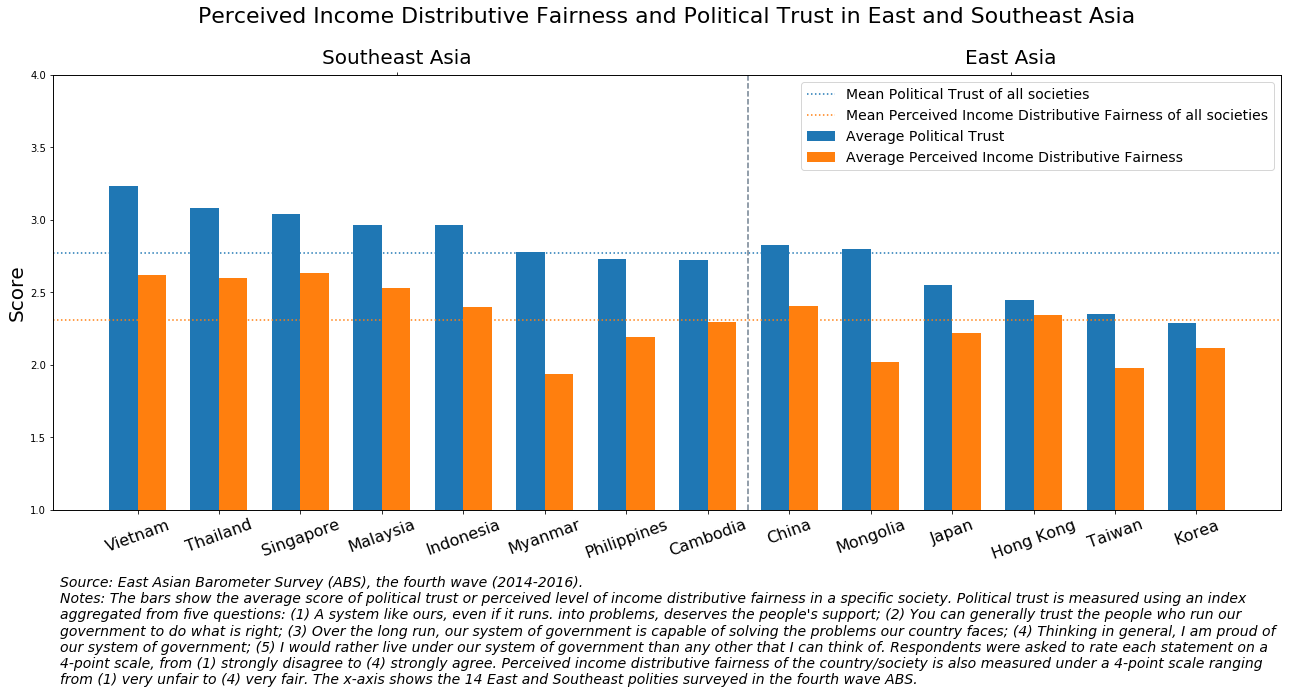

In [11]:
# construct the visualization
ind = np.arange(14)  # the x locations for the groups
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(22,8))
ax2 = ax.twiny() # the second x axis
ax.axhline(y=mean_countries_trust, linestyle=':', label='Mean Political Trust of all societies')
ax.axhline(y=mean_countries_fair, color='C1', linestyle=':', 
           label='Mean Perceived Income Distributive Fairness of all societies')
rects1 = ax.bar(ind - width/2, trust_y, width, label='Average Political Trust')
rects2 = ax.bar(ind + width/2, soc_fair_y, width, label='Average Perceived Income Distributive Fairness')
ax.axvline(x=7.5, color='slategrey', linestyle='--')
# Add some text for labels, titles and legends
ax.set_ylabel('Score', fontsize=20)
ax.set_ylim([1,4])
ax.text(0.5, 1.12, 'Perceived Income Distributive Fairness and Political Trust in East and Southeast Asia', 
        horizontalalignment='center', fontsize=22, transform = ax2.transAxes)
ax.text(-0.95, -0.2, notes, fontsize=14, fontstyle='italic')
ax.set_xticks(ind)
ax.set_xticklabels(('Vietnam', 'Thailand','Singapore', 'Malaysia', 'Indonesia', 'Myanmar', 'Philippines', \
                    'Cambodia', 'China', 'Mongolia', 'Japan', 'Hong Kong', 'Taiwan', 'Korea'), 
                   fontsize=16, rotation=20)
newpos = [0.28,0.78] # positions of the xticklabels: the position in the new x-axis
newlabel = ['Southeast Asia', 'East Asia']
ax2.set_xticks(newpos)
ax2.set_xticklabels(newlabel, fontsize=20)
ax.legend(fontsize=14)

<br>
Description:
<br>
  From the graph, we could see that citizens in Southeast Asian societies generally have higher levels of political trust and perceive their societies as fairer comparing with citizens in East Asian societies. Citizens in most societies of East and Southeast Asia trust their governments while perceive their societies as unfair. It is also notable that the three societies enjoy highest levels of political trust are authoritarian or military polities, while the four societies enjoy highest levels of political trust are the most democratic polities in East Asia, confirming the widely empirically supported intriguing finding that authoritarian regimes tend to receive higher popular support than democratic regime. The relationship between perceived income distributive fairness and  political trust vary widely across societies in East and Southeast Asia.
<br>
<br>

4. Calculate the common measures of central tendency and variation, and then display your results.

In [12]:
data['average_trust'].describe()

count    18799.000000
mean         2.769306
std          0.598301
min          1.000000
25%          2.400000
50%          2.800000
75%          3.000000
max          4.000000
Name: average_trust, dtype: float64

5. Describe the numeric output in substantive terms, e.g.,
<br>
<br>
a. What do these numeric descriptions of data reveal?
<br>
The mean political trust level is 2.77 (under a 1-4 scale); the standard deviation is 0.60; the lowest political trust level reported in this sample is 1.00; the 25 percentil is 2.40; the median is 2.80; the 75 percentil is 3.00;  the highest political trust level reported in this sample is 4.00.
<br>
<br>
b. Why is this important?
<br>
It is useful to know the central tendency, variation and the distribution pattern of the data.
<br>
<br>
c. What might you infer about the distribution or spread of the data? Why? 
<br>
Most adult residents in the 14 east and southeast asian polities tend to show quite high level trust in their political systems, as the mean (2.77) and median (2.80) political trust level are both larger than the median of the scale (2.5) and the 25 percentile (2.4) is already close to the median of the scale. The Standard deviation (0.60) is low, which reveals that there is little variation in the political trust level among the adult residents in the 14 east and southeast asian polities.